# Including Packages

Yfinance package is downloaded and used to download the financial time series data for "Zoom Video Communications". Numpy library provides and supports a lot of mathematical operations which are needed in designing a price derivative of a stock. Pandas library provides data structures and operations to manipulate and analyse data. Matplotlib is a plotting library for Numpy which provides embeded plots. The OS module in Python provides functions for creating and removing a directory (folder), fetching its contents, changing and identifying the current directory, etc.

In [3]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as si
import os

# Downloading and viewing the data

In [4]:
Zoom = yf.download("ZM", start="2020-12-01", end="2021-12-01")

[*********************100%***********************]  1 of 1 completed


In [5]:
Zoom.head()  #Shows the first five rows


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-01,434.720001,434.989990,401.720001,406.309998,406.309998,20837500
2020-12-02,399.000000,424.549988,394.570007,412.859985,412.859985,10962800
2020-12-03,413.000000,419.170013,405.019989,413.540009,413.540009,6306700
2020-12-04,409.260010,418.880005,408.186005,410.010010,410.010010,4447300
2020-12-07,411.000000,416.799988,405.454010,407.850006,407.850006,4427300


In [6]:
Zoom.tail()   #Shows the last five rows

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-23,218.050003,218.610001,195.800003,206.639999,206.639999,25297500
2021-11-24,203.897003,211.500000,202.020004,208.300003,208.300003,9218600
2021-11-26,235.699997,235.970001,219.210007,220.210007,220.210007,10808600
2021-11-29,216.429993,219.360001,208.460007,218.979996,218.979996,7035400
2021-11-30,220.660004,221.404999,207.399994,211.410004,211.410004,5916200


# Descriptive Satistics

In [7]:
Zoom['Adj Close'].describe().round(2)

count    252.00
mean     335.41
std       50.74
min      206.64
25%      294.72
50%      337.57
75%      374.95
max      444.51
Name: Adj Close, dtype: float64

# Plotting the movement of the stock

array([<AxesSubplot:xlabel='Date'>], dtype=object)

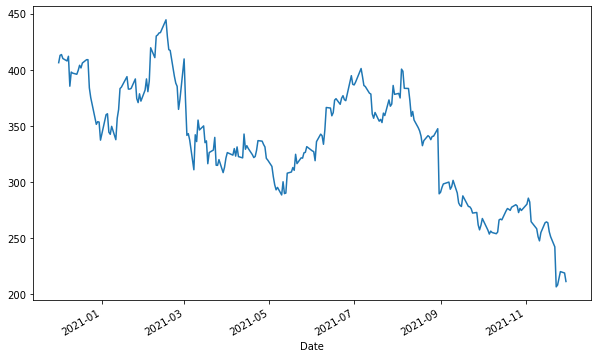

In [8]:
Zoom['Adj Close'].plot(figsize=(10, 6), subplots=True)        #Plotting the Adj CLose Column of the data

In [9]:
SPT = Zoom['Adj Close'][-1]
print('The spot price is $', round(SPT,2), '.')

The spot price is $ 211.41 .


# Calculating and plotting Annualized Volatility

Annualized volatility is calculated by computing the daily volatility and then multiplying it with the square root of 252 which is the number of working days in a year.

In [10]:
log_return = np.log(Zoom['Adj Close'] / Zoom['Adj Close'].shift(1))
vol_h = np.sqrt(252)* log_return.std()
print('The annualised volatility is', round(vol_h*100,2), '%')


The annualised volatility is 51.31 %


Text(0.5, 1.0, 'Zoom volatility:51.31%')

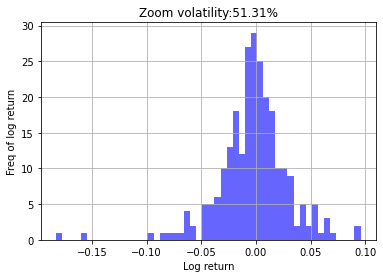

In [11]:
Zoom['Log returns'] = np.log(Zoom['Close']/Zoom['Close'].shift())

str_vol = str(round(vol_h, 4)*100)

fig, ax = plt.subplots()
Zoom['Log returns'].hist(ax=ax, bins=50, alpha=0.6, color='b')
ax.set_xlabel('Log return')
ax.set_ylabel('Freq of log return')
ax.set_title('Zoom volatility:'+ str_vol + '%')

In [12]:
Zoom['Adj Close'].describe().round(2)

count    252.00
mean     335.41
std       50.74
min      206.64
25%      294.72
50%      337.57
75%      374.95
max      444.51
Name: Adj Close, dtype: float64

# Changes over time

In [13]:
rets = np.log(Zoom['Adj Close'] / Zoom['Adj Close'].shift(1))
rets.head().round(4)

Date
2020-12-01       NaN
2020-12-02    0.0160
2020-12-03    0.0016
2020-12-04   -0.0086
2020-12-07   -0.0053
Name: Adj Close, dtype: float64

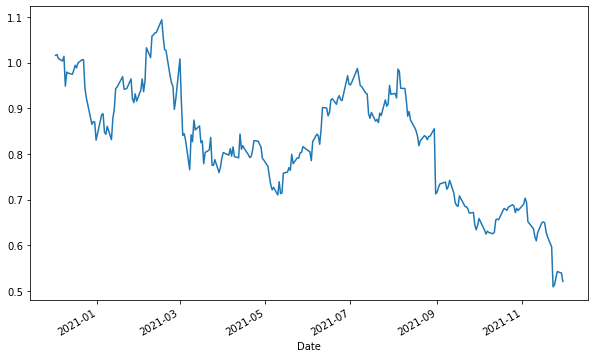

In [14]:
rets.cumsum().apply(np.exp).plot(figsize=(10, 6));

# Rolling Satistics

In [15]:
Zoom['min'] = Zoom['Adj Close'].rolling(10).min()
Zoom['mean'] = Zoom['Adj Close'].rolling(10).mean()
Zoom['std'] =Zoom['Adj Close'].rolling(10).std()
Zoom['median'] = Zoom['Adj Close'].rolling(10).median()
Zoom['max'] = Zoom['Adj Close'].rolling(10).max()
Zoom['ewma'] = Zoom['Adj Close'].ewm(halflife=0.5, min_periods=10).mean()
Zoom.dropna().head()

,Open,High,Low,Close,Adj Close,Volume,Log returns,min,mean,std,median,max,ewma
Date,,,,,,,,,,,,,
2020-12-14,388.950012,396.750000,376.679993,395.989990,395.989990,6820100,-0.002573,385.359985,403.888998,9.348909,407.080002,413.540009,396.208202
2020-12-15,398.505005,410.320007,395.079987,399.429993,399.429993,5144700,0.008650,385.359985,403.200998,9.403940,403.639999,413.540009,398.624545
2020-12-16,400.485992,406.558014,393.459991,404.000000,404.000000,4158500,0.011376,385.359985,402.314999,8.790142,401.714996,413.540009,402.656137
2020-12-17,408.720001,409.029999,399.559998,401.619995,401.619995,3792500,-0.005909,385.359985,401.122998,7.857571,400.524994,412.000000,401.879030
2020-12-18,403.799988,408.109985,398.250000,406.010010,406.010010,6174800,0.010871,385.359985,400.722998,7.445929,400.524994,412.000000,404.977265


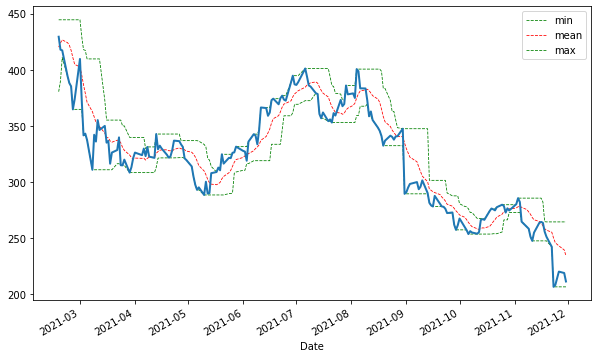

In [16]:
ax = Zoom[['min', 'mean', 'max']].iloc[-200:].plot(figsize=(10, 6), style=['g--', 'r--', 'g--'], lw=0.8)
Zoom['Adj Close'].iloc[-200:].plot(ax=ax, lw=2.0);

In [17]:
Zoom['SMA1'] = Zoom['Adj Close'].rolling(20).mean()
Zoom['SMA2'] = Zoom['Adj Close'].rolling(60).mean()
Zoom[['Adj Close', 'SMA1', 'SMA2']].tail()

,Adj Close,SMA1,SMA2
Date,,,
2021-11-23,206.639999,261.791999,270.861499
2021-11-24,208.300003,258.566499,269.508166
2021-11-26,220.210007,255.748000,268.330666
2021-11-29,218.979996,252.964500,267.062166
2021-11-30,211.410004,249.588000,265.614166


plotting the above results as moving averages and adjust close price

<AxesSubplot:xlabel='Date'>

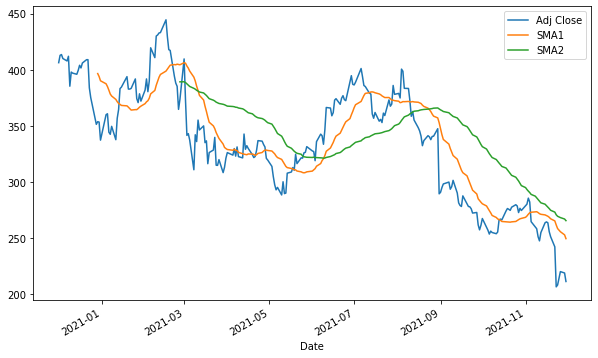

In [18]:
Zoom[['Adj Close', 'SMA1', 'SMA2']].plot(figsize=(10, 6))

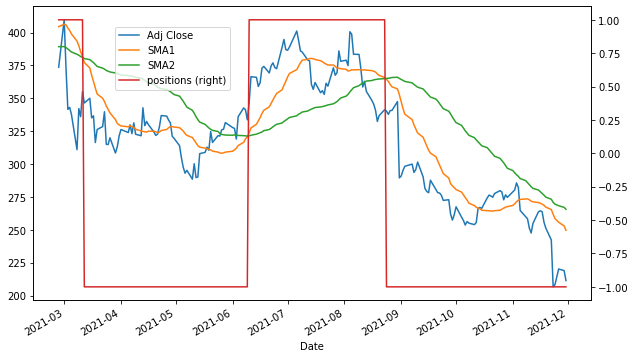

In [19]:
Zoom.dropna(inplace=True)
Zoom['positions'] = np.where(Zoom['SMA1'] > Zoom['SMA2'],1,-1)
ax = Zoom[['Adj Close', 'SMA1', 'SMA2', 'positions']].plot(figsize=(10, 6),secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((0.25, 0.7))

In [20]:
Zoom['Adj Close'].tail()

Date
2021-11-23    206.639999
2021-11-24    208.300003
2021-11-26    220.210007
2021-11-29    218.979996
2021-11-30    211.410004
Name: Adj Close, dtype: float64

# Binomial Model

In [21]:
S0 = Zoom['Adj Close'][-1]            # spot stock price
K = 185.0               # strike
T = 1.0                 # maturity 
r = 0.0134                # risk free rate 
sig = 0.519               # diffusion coefficient or volatility
N = 3                   # number of periods or number of time steps  
payoff = "call"          # payoff 


In [22]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u  

In [23]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [24]:
S

array([[211.41000366, 285.2723058 , 384.94057539, 519.43088612],
       [  0.        , 156.67202438, 211.41000366, 285.2723058 ],
       [  0.        ,   0.        , 116.10672531, 156.67202438],
       [  0.        ,   0.        ,   0.        ,  86.04453613]])

In [25]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.4330036354628137

In [26]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[  0.        ,   0.        ,   0.        , 334.43088612],
       [  0.        ,   0.        ,   0.        , 100.2723058 ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ]])

In [27]:
# for European Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[ 58.34269916, 110.94363456, 200.76506599, 334.43088612],
       [  0.        ,  18.6330689 ,  43.22477047, 100.2723058 ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ]])

In [28]:
print('European ' + payoff, str( V[0,0]))

European call 58.342699160128184


# Black Scholes Model

In [29]:
def euro_option_bs(S, K, T, r, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [30]:
euro_option_bs(211.41, 185, 1, 0.0144, 0.519, 'call')

56.42412261546555

In [31]:
S = np.linspace(50,220,25)
cp = np.zeros((len(S),1))
for i in range(len(S)):
    cp[i] = euro_option_bs(S[i], 185, 1, 0.0144, 0.519, 'call')

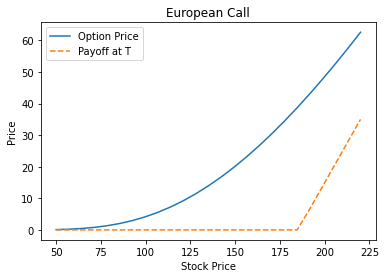

In [32]:
fig = plt.figure()
plt.plot(S, cp, '-')
plt.plot(S, np.maximum(S-185,0), '--')
plt.xlabel('Stock Price')
plt.ylabel('Price')
plt.title('European Call')
plt.legend(['Option Price','Payoff at T'])


# Greeks

Greeks are used to indicate different risk factors which are associated with options. These variables are denoted with Greeks symbols and each Greek is a representation of the option with other underlying variables. Greeks provide traders with a way to better understand the risk and possible rewards associated with a option. Some of the calculated Greeks for Zoom’s Stock Option with the described input variables are explained below:

# Delta

In [33]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

In [34]:
delta(211.41, 185, 1, 0.0144, 0 , 0.519, 'call')

0.7069039197217006

In [35]:
S = np.linspace(50,250,25)
Delta_Call = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Call [i] = delta(S[i], 185, 1, 0.0144, 0, 0.519, 'call')

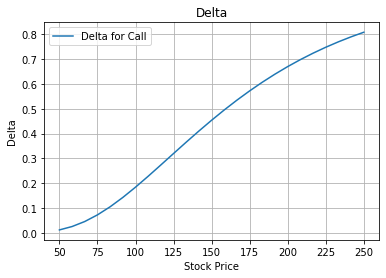

In [36]:
fig = plt.figure()
plt.plot(S, Delta_Call, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Call'])

In [37]:
Ssd = np.linspace(60, 230, 51)
Tsd = np.linspace(0.5, 2, 51)
Delta = np.zeros((len(Tsd),len(Ssd)))
for j in range(len(Ssd)):
    for i in range(len(Tsd)):
        Delta[i,j] = delta(Ssd[j], 185, Tsd[i], 0.0144, 0, 0.519, 'call')

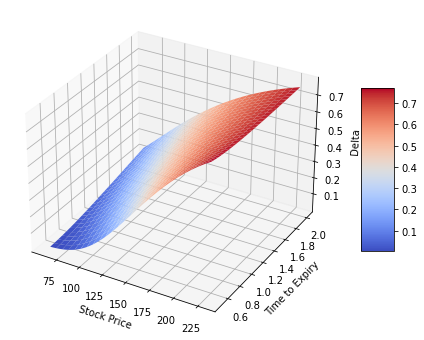

In [38]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
Ssd, Tsd = np.meshgrid(Ssd, Tsd)
surf = ax.plot_surface(Ssd, Tsd, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Gamma

In [39]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [40]:
gamma(211.41, 185, 1, 0.0144, 0 , 0.519, 'call')

0.003135233304723332

In [41]:
S = np.linspace(50,250,25)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 185, 1,0.0144, 0 , 0.519, 'call')

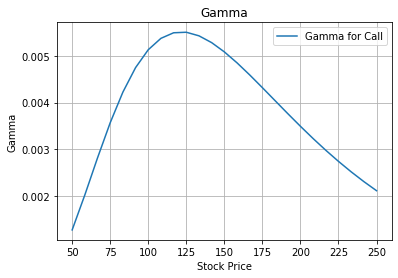

In [42]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Call'])

In [43]:
Ssg = np.linspace(60, 260, 51)
Tsg = np.linspace(0.5, 2, 51)
Gamma = np.zeros((len(Tsg),len(Ssg)))
for j in range(len(Ssg)):
    for i in range(len(Tsg)):
        Gamma[i,j] = gamma(Ssg[j], 185, Tsg[i], 0.0144, 0 , 0.519, 'call')

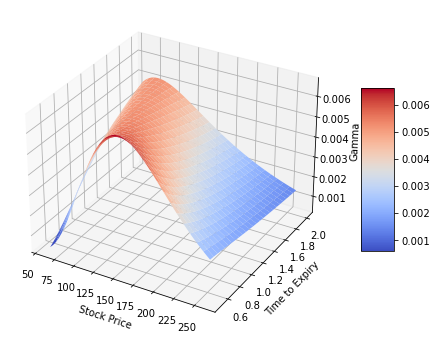

In [44]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
Ssg, Tsg = np.meshgrid(Ssg, Tsg)
surf = ax.plot_surface(Ssg, Tsg, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Speed

In [45]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [46]:
speed(211.41, 185, 1, 0.0144, 0 , 0.519, 'call')

-3.0384930851240746e-05

In [47]:
S = np.linspace(30,250,35)
Speed = np.zeros((len(S),1))
for i in range(len(S)):
    Speed [i] = speed(S[i], 185, 1, 0.0144, 0 , 0.519, 'call')


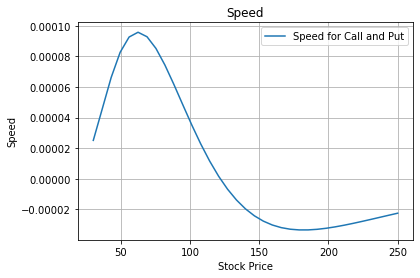

In [48]:
fig = plt.figure()
plt.plot(S, Speed, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Speed for Call and Put'])

In [49]:
Sss = np.linspace(50, 260, 51)
Tss = np.linspace(0.5, 2, 51)
Speed = np.zeros((len(Tss),len(Sss)))
for j in range(len(Sss)):
    for i in range(len(Tss)):
        Speed[i,j] = speed(Sss[j], 185, Tss[i], 0.0144, 0 , 0.519, 'call')

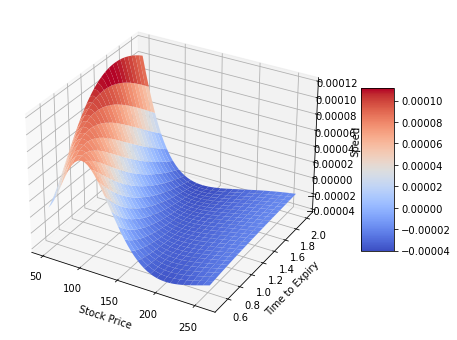

In [50]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
Sss, Tss = np.meshgrid(Sss, Tss)
surf = ax.plot_surface(Sss, Tss, Speed, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Speed')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Theta

In [57]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = -vol * S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = -vol * S * np.exp(-q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [58]:
theta(211.41, 185, 1, 0.0144, 0 , 0.519, 'call')

-17.532811905256043

In [59]:
T = np.linspace(0.25,8,35)
Theta_Call = np.zeros((len(T),1))
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Call [i] = theta(211.41, 185, T[i],  0.0144, 0 , 0.519, 'call')

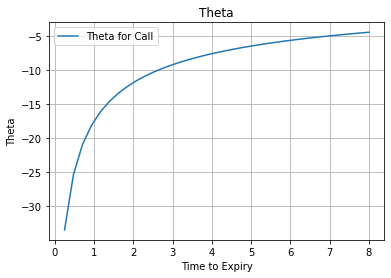

In [60]:
fig = plt.figure()
plt.plot(T, Theta_Call, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Call'])

In [61]:
Sst = np.linspace(110, 225, 51)
Tst = np.linspace(0.5, 2, 51)
Theta = np.zeros((len(Tst),len(Sst)))
for j in range(len(Sst)):
    for i in range(len(Tst)):
        Theta[i,j] = theta(Sst[j], 185, Tst[i],  0.0144, 0 , 0.519, 'call')

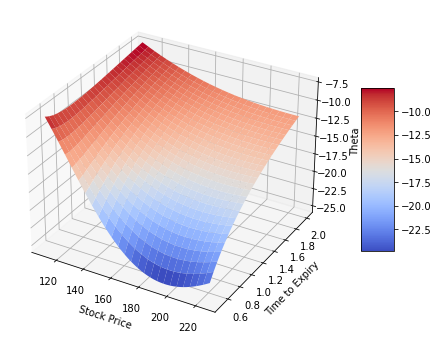

In [62]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
Sst, Tst = np.meshgrid(Sst, Tst)
surf = ax.plot_surface(Sst, Tst, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Vega

In [63]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega/100

In [64]:
vega(211.41, 185, 1, 0.0144, 0 , 0.519, 'call')

0.7272576096345971

In [65]:
vol = np.linspace(0.1,4.9,35)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(211.41,  185, 1, 0.0144, 0, vol[i], 'call')

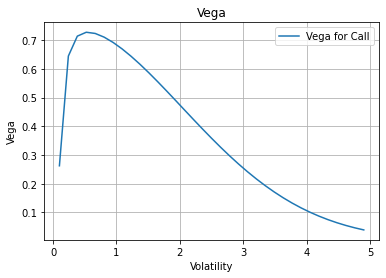

In [66]:
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Call'])

In [67]:
Ssv = np.linspace(110, 250, 51)
Tsv = np.linspace(0.5, 2, 51)
Vega = np.zeros((len(Tsv),len(Ssv)))
for j in range(len(Ssv)):
    for i in range(len(Tsv)):
        Vega[i,j] = vega(Ssv[j], 185, Tsv[i], 0.0144, 0, 0.519, 'call')

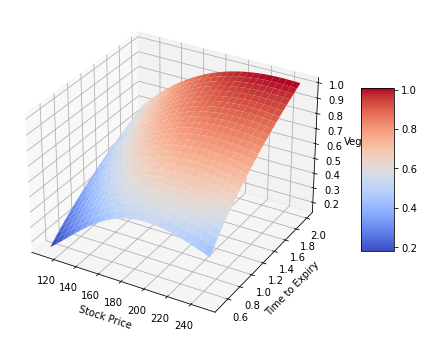

In [68]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
Ssv, Tsv = np.meshgrid(Ssv, Tsv)
surf = ax.plot_surface(Ssv, Tsv, Vega, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);

# End

In [61]:
import blsprice

ModuleNotFoundError: No module named 'blsprice'